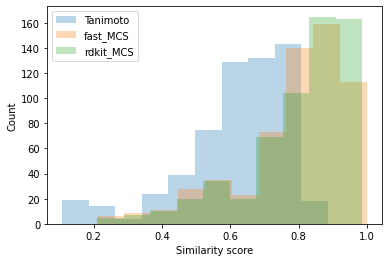

In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

for k in ['Tanimoto', 'fast_MCS', 'rdkit_MCS']:
    df = pd.read_csv('outputs/%s_Mutations.csv' % k)
    scores = [s[1] for ss in df['similar_mols'] for s in eval(ss)]
    plt.hist(scores, label=k, alpha=0.3)

plt.xlabel('Similarity score')
plt.ylabel('Count')
plt.legend()
plt.show()

Tanimoto: 0.0002s
Tanimoto: 1.00
fast_MCS: 1.98
rdkit_MCS: 60036.72


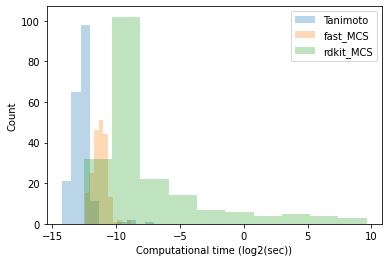

In [2]:
for k in ['Tanimoto', 'fast_MCS', 'rdkit_MCS']:
    df = pd.read_csv('outputs/%s_Mutations.csv' % k)
    if k == 'Tanimoto':
        baseline = np.mean(df['time'].tolist())
        print ('Tanimoto: %.4fs' % baseline)
    print ('%s: %.2f' % (k, (np.mean(df['time'].tolist())/baseline)))
    plt.hist([np.log2(t) for t in df['time'].tolist()], label=k, alpha=0.3)

plt.xlabel('Computational time (log2(sec))')
plt.ylabel('Count')
plt.legend()
plt.show()

In [3]:
sim_mols = {}
for k in ['Tanimoto', 'rdkit_MCS', 'fast_MCS', 'hybrid']:
    df = pd.read_csv('outputs/%s_Mutations.csv' % k)
    smiles = df['smiles'].tolist()
    mols = {}
    for i, ss in enumerate(df['similar_mols']):
        mols[i] = eval(ss)
    sim_mols[k] = mols

Smiles: Cc1cc(C(F)(F)F)c(N)c(Cl)n1
Tanimoto [0.4857142857142857, 0.4857142857142857, 0.48484848484848486]
rdkit_MCS [0.96, 0.96, 0.8333333333333334]
fast_MCS [0.88, 0.88, 0.75]
hybrid [0.6531972647421809, 0.643519733231875, 0.6035608621222174]


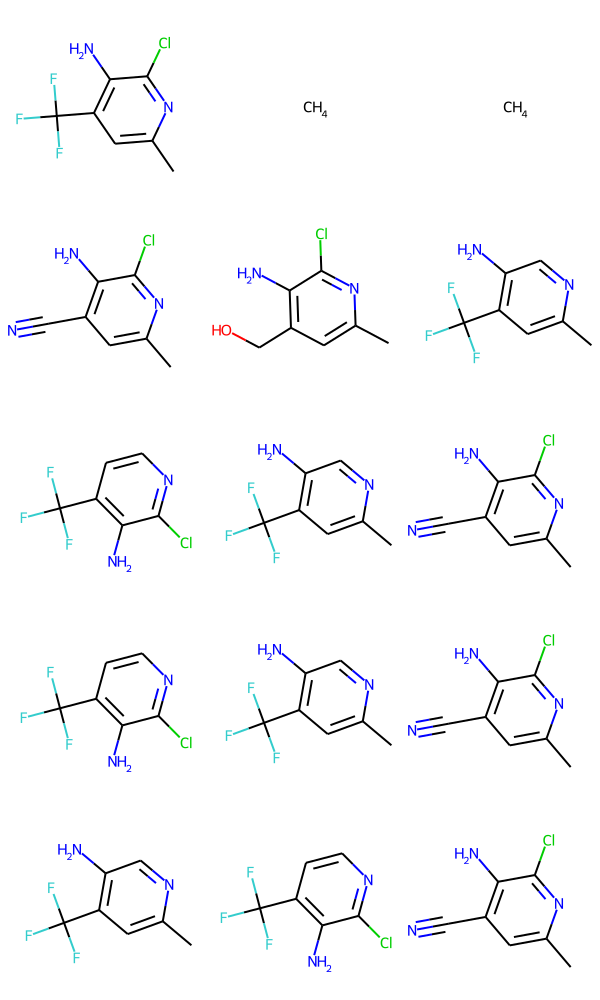

In [4]:
from rdkit import Chem

i = 95
print ('Smiles:', smiles[i])
sims = {}
display_mols = [smiles[i], 'C', 'C']
for k, v in sim_mols.items():
    display_mols += [vv[0] for vv in v[i]]
    print (k, [vv[1] for vv in v[i]])
    

Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in display_mols])